<a href="https://colab.research.google.com/github/tech-dhawal-03/Animal-Migration-Factors-Research/blob/main/Kuno_Animal_Migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Business Understanding : we are going to make a Machine learning model which predict whether animals migrate
#near Kuno National Park which includes the weather dataset for cities like Sheopur.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df1 = pd.read_csv('/content/sample_data/Sheopur 2024-01-02 to 2025-04-23.csv')
df2 = pd.read_csv('/content/sample_data/Sheopur 2023-01-02 to 2024-01-01.csv')
df3 = pd.read_csv('/content/sample_data/Sheopur 2022-01-01 to 2023-01-01.csv')

In [11]:
df1

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Sheopur,2024-01-02,17.3,12.7,14.7,17.3,12.7,14.7,12.1,84.6,...,9.4,5,10,2024-01-02T07:09:54,2024-01-02T17:44:07,0.70,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,remote
1,Sheopur,2024-01-03,17.3,12.5,14.8,17.3,12.5,14.8,11.0,77.8,...,8.3,4,10,2024-01-03T07:10:09,2024-01-03T17:44:47,0.73,Overcast,Cloudy skies throughout the day.,cloudy,remote
2,Sheopur,2024-01-04,15.5,12.8,14.2,15.5,12.8,14.2,11.9,86.4,...,8.1,3,10,2024-01-04T07:10:24,2024-01-04T17:45:29,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,remote
3,Sheopur,2024-01-05,16.0,12.4,14.2,16.0,12.4,14.2,11.7,85.1,...,8.3,5,10,2024-01-05T07:10:37,2024-01-05T17:46:10,0.80,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,remote
4,Sheopur,2024-01-06,17.5,12.2,14.3,17.5,12.2,14.3,11.2,81.6,...,13.5,6,10,2024-01-06T07:10:48,2024-01-06T17:46:53,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,remote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Sheopur,2025-04-19,42.2,29.5,35.6,38.5,27.8,32.9,1.4,12.4,...,27.4,10,10,2025-04-19T05:56:45,2025-04-19T18:48:23,0.71,Clear,Clear conditions throughout the day.,clear-day,remote
474,Sheopur,2025-04-20,39.8,27.5,33.9,37.5,26.5,31.9,5.4,17.2,...,27.0,10,10,2025-04-20T05:55:51,2025-04-20T18:48:52,0.75,Clear,Clear conditions throughout the day.,clear-day,remote
475,Sheopur,2025-04-21,40.1,27.8,34.0,36.4,26.5,31.4,-4.4,10.2,...,28.3,10,10,2025-04-21T05:54:57,2025-04-21T18:49:21,0.75,Clear,Clear conditions throughout the day.,clear-day,remote
476,Sheopur,2025-04-22,40.7,27.1,33.9,37.0,25.9,31.4,-5.0,8.2,...,28.0,10,10,2025-04-22T05:54:04,2025-04-22T18:49:51,0.81,Clear,Clear conditions throughout the day.,clear-day,remote


In [12]:
df2

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Sheopur,2023-01-02,19.0,9.0,13.3,19.0,8.1,13.1,9.4,78.4,...,15.9,7,10,2023-01-02T07:09:57,2023-01-02T17:44:16,0.34,Clear,Clear conditions throughout the day.,clear-day,remote
1,Sheopur,2023-01-03,16.7,9.3,12.1,16.7,8.2,11.7,8.9,81.9,...,15.7,7,10,2023-01-03T07:10:13,2023-01-03T17:44:57,0.37,Clear,Clear conditions throughout the day.,clear-day,remote
2,Sheopur,2023-01-04,16.1,7.2,10.6,16.1,6.0,10.0,6.8,78.6,...,16.2,7,10,2023-01-04T07:10:27,2023-01-04T17:45:38,0.41,Clear,Clear conditions throughout the day.,clear-day,remote
3,Sheopur,2023-01-05,16.1,5.8,9.9,16.1,4.4,9.1,6.2,79.3,...,16.5,7,10,2023-01-05T07:10:39,2023-01-05T17:46:20,0.44,Clear,Clear conditions throughout the day.,clear-day,remote
4,Sheopur,2023-01-06,17.1,4.9,10.3,17.1,3.2,9.7,6.0,77.1,...,16.0,7,10,2023-01-06T07:10:51,2023-01-06T17:47:03,0.48,Clear,Clear conditions throughout the day.,clear-day,remote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Sheopur,2023-12-28,22.0,10.9,15.4,22.0,10.9,15.4,11.7,79.9,...,15.5,7,10,2023-12-28T07:08:15,2023-12-28T17:40:56,0.54,Clear,Clear conditions throughout the day.,clear-day,remote
361,Sheopur,2023-12-29,20.4,11.1,15.1,20.4,11.1,15.1,11.3,79.2,...,15.5,7,10,2023-12-29T07:08:37,2023-12-29T17:41:32,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,remote
362,Sheopur,2023-12-30,21.7,11.4,15.5,21.7,11.4,15.5,12.6,83.0,...,14.5,7,10,2023-12-30T07:08:58,2023-12-30T17:42:10,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,remote
363,Sheopur,2023-12-31,19.9,13.2,15.9,19.9,13.2,15.9,13.2,84.4,...,12.1,6,10,2023-12-31T07:09:18,2023-12-31T17:42:48,0.64,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,remote


In [13]:
df3

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Sheopur,2022-01-01,19.8,9.4,13.7,19.8,8.7,13.5,9.8,78.5,...,14.5,6,NaN,2022-01-01T07:09:44,2022-01-01T17:43:45,0.95,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,remote
1,Sheopur,2022-01-02,20.9,8.7,13.9,20.9,7.6,13.6,9.8,77.8,...,15.2,7,NaN,2022-01-02T07:10:00,2022-01-02T17:44:26,0.98,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,remote
2,Sheopur,2022-01-03,21.7,8.4,14.0,21.7,7.5,13.8,9.3,74.9,...,15.6,7,NaN,2022-01-03T07:10:16,2022-01-03T17:45:06,0.00,Clear,Clear conditions throughout the day.,clear-day,remote
3,Sheopur,2022-01-04,23.8,7.9,15.1,23.8,7.2,14.9,11.0,78.5,...,15.4,7,NaN,2022-01-04T07:10:29,2022-01-04T17:45:48,0.05,Clear,Clear conditions throughout the day.,clear-day,remote
4,Sheopur,2022-01-05,22.5,12.7,16.8,22.5,12.7,16.8,13.6,82.3,...,9.4,4,NaN,2022-01-05T07:10:42,2022-01-05T17:46:30,0.08,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,remote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Sheopur,2022-12-28,24.9,10.0,16.4,24.9,10.0,16.4,7.1,57.6,...,15.7,7,10.0,2022-12-28T07:08:20,2022-12-28T17:41:04,0.17,Clear,Clear conditions throughout the day.,clear-day,remote
362,Sheopur,2022-12-29,26.6,10.4,17.9,26.6,10.4,17.9,7.3,52.9,...,15.2,7,10.0,2022-12-29T07:08:42,2022-12-29T17:41:41,0.20,Clear,Clear conditions throughout the day.,clear-day,remote
363,Sheopur,2022-12-30,25.8,12.0,17.8,25.8,12.0,17.8,10.5,63.3,...,15.1,7,10.0,2022-12-30T07:09:03,2022-12-30T17:42:18,0.25,Clear,Clear conditions throughout the day.,clear-day,remote
364,Sheopur,2022-12-31,20.1,11.6,15.9,20.1,11.6,15.9,10.6,71.8,...,15.7,7,10.0,2022-12-31T07:09:22,2022-12-31T17:42:57,0.27,Clear,Clear conditions throughout the day.,clear-day,remote


In [14]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Sheopur,2024-01-02,17.3,12.7,14.7,17.3,12.7,14.7,12.1,84.6,...,9.4,5,10.0,2024-01-02T07:09:54,2024-01-02T17:44:07,0.70,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,remote
1,Sheopur,2024-01-03,17.3,12.5,14.8,17.3,12.5,14.8,11.0,77.8,...,8.3,4,10.0,2024-01-03T07:10:09,2024-01-03T17:44:47,0.73,Overcast,Cloudy skies throughout the day.,cloudy,remote
2,Sheopur,2024-01-04,15.5,12.8,14.2,15.5,12.8,14.2,11.9,86.4,...,8.1,3,10.0,2024-01-04T07:10:24,2024-01-04T17:45:29,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,remote
3,Sheopur,2024-01-05,16.0,12.4,14.2,16.0,12.4,14.2,11.7,85.1,...,8.3,5,10.0,2024-01-05T07:10:37,2024-01-05T17:46:10,0.80,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,remote
4,Sheopur,2024-01-06,17.5,12.2,14.3,17.5,12.2,14.3,11.2,81.6,...,13.5,6,10.0,2024-01-06T07:10:48,2024-01-06T17:46:53,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,remote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Sheopur,2022-12-28,24.9,10.0,16.4,24.9,10.0,16.4,7.1,57.6,...,15.7,7,10.0,2022-12-28T07:08:20,2022-12-28T17:41:04,0.17,Clear,Clear conditions throughout the day.,clear-day,remote
1205,Sheopur,2022-12-29,26.6,10.4,17.9,26.6,10.4,17.9,7.3,52.9,...,15.2,7,10.0,2022-12-29T07:08:42,2022-12-29T17:41:41,0.20,Clear,Clear conditions throughout the day.,clear-day,remote
1206,Sheopur,2022-12-30,25.8,12.0,17.8,25.8,12.0,17.8,10.5,63.3,...,15.1,7,10.0,2022-12-30T07:09:03,2022-12-30T17:42:18,0.25,Clear,Clear conditions throughout the day.,clear-day,remote
1207,Sheopur,2022-12-31,20.1,11.6,15.9,20.1,11.6,15.9,10.6,71.8,...,15.7,7,10.0,2022-12-31T07:09:22,2022-12-31T17:42:57,0.27,Clear,Clear conditions throughout the day.,clear-day,remote


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1209 non-null   object 
 1   datetime          1209 non-null   object 
 2   tempmax           1209 non-null   float64
 3   tempmin           1209 non-null   float64
 4   temp              1209 non-null   float64
 5   feelslikemax      1209 non-null   float64
 6   feelslikemin      1209 non-null   float64
 7   feelslike         1209 non-null   float64
 8   dew               1209 non-null   float64
 9   humidity          1209 non-null   float64
 10  precip            1209 non-null   float64
 11  precipprob        1209 non-null   int64  
 12  precipcover       1209 non-null   float64
 13  preciptype        422 non-null    object 
 14  snow              1209 non-null   int64  
 15  snowdepth         1209 non-null   int64  
 16  windgust          1209 non-null   float64


In [16]:
df.drop(columns=['moonphase','conditions','description','icon','stations'], inplace=True)

In [17]:
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset
0,Sheopur,2024-01-02,17.3,12.7,14.7,17.3,12.7,14.7,12.1,84.6,...,53.0,1017.0,76.0,24.1,109.5,9.4,5,10.0,2024-01-02T07:09:54,2024-01-02T17:44:07
1,Sheopur,2024-01-03,17.3,12.5,14.8,17.3,12.5,14.8,11.0,77.8,...,49.0,1016.5,93.3,24.1,94.1,8.3,4,10.0,2024-01-03T07:10:09,2024-01-03T17:44:47
2,Sheopur,2024-01-04,15.5,12.8,14.2,15.5,12.8,14.2,11.9,86.4,...,41.4,1017.1,83.6,24.1,93.2,8.1,3,10.0,2024-01-04T07:10:24,2024-01-04T17:45:29
3,Sheopur,2024-01-05,16.0,12.4,14.2,16.0,12.4,14.2,11.7,85.1,...,41.3,1017.1,81.3,24.1,95.1,8.3,5,10.0,2024-01-05T07:10:37,2024-01-05T17:46:10
4,Sheopur,2024-01-06,17.5,12.2,14.3,17.5,12.2,14.3,11.2,81.6,...,38.1,1018.7,28.1,24.1,155.9,13.5,6,10.0,2024-01-06T07:10:48,2024-01-06T17:46:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Sheopur,2022-12-28,24.9,10.0,16.4,24.9,10.0,16.4,7.1,57.6,...,282.5,1018.7,0.0,24.1,181.7,15.7,7,10.0,2022-12-28T07:08:20,2022-12-28T17:41:04
1205,Sheopur,2022-12-29,26.6,10.4,17.9,26.6,10.4,17.9,7.3,52.9,...,152.2,1018.4,0.2,24.1,178.1,15.2,7,10.0,2022-12-29T07:08:42,2022-12-29T17:41:41
1206,Sheopur,2022-12-30,25.8,12.0,17.8,25.8,12.0,17.8,10.5,63.3,...,276.5,1018.1,6.9,24.1,175.5,15.1,7,10.0,2022-12-30T07:09:03,2022-12-30T17:42:18
1207,Sheopur,2022-12-31,20.1,11.6,15.9,20.1,11.6,15.9,10.6,71.8,...,356.8,1020.0,0.6,24.1,182.9,15.7,7,10.0,2022-12-31T07:09:22,2022-12-31T17:42:57


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1209 non-null   object 
 1   datetime          1209 non-null   object 
 2   tempmax           1209 non-null   float64
 3   tempmin           1209 non-null   float64
 4   temp              1209 non-null   float64
 5   feelslikemax      1209 non-null   float64
 6   feelslikemin      1209 non-null   float64
 7   feelslike         1209 non-null   float64
 8   dew               1209 non-null   float64
 9   humidity          1209 non-null   float64
 10  precip            1209 non-null   float64
 11  precipprob        1209 non-null   int64  
 12  precipcover       1209 non-null   float64
 13  preciptype        422 non-null    object 
 14  snow              1209 non-null   int64  
 15  snowdepth         1209 non-null   int64  
 16  windgust          1209 non-null   float64


In [19]:
df.drop(columns=['sunrise','sunset'], inplace=True)
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
0,Sheopur,2024-01-02,17.3,12.7,14.7,17.3,12.7,14.7,12.1,84.6,...,25.2,12.6,53.0,1017.0,76.0,24.1,109.5,9.4,5,10.0
1,Sheopur,2024-01-03,17.3,12.5,14.8,17.3,12.5,14.8,11.0,77.8,...,28.1,12.2,49.0,1016.5,93.3,24.1,94.1,8.3,4,10.0
2,Sheopur,2024-01-04,15.5,12.8,14.2,15.5,12.8,14.2,11.9,86.4,...,24.5,11.5,41.4,1017.1,83.6,24.1,93.2,8.1,3,10.0
3,Sheopur,2024-01-05,16.0,12.4,14.2,16.0,12.4,14.2,11.7,85.1,...,23.0,11.2,41.3,1017.1,81.3,24.1,95.1,8.3,5,10.0
4,Sheopur,2024-01-06,17.5,12.2,14.3,17.5,12.2,14.3,11.2,81.6,...,22.7,9.7,38.1,1018.7,28.1,24.1,155.9,13.5,6,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Sheopur,2022-12-28,24.9,10.0,16.4,24.9,10.0,16.4,7.1,57.6,...,17.3,6.1,282.5,1018.7,0.0,24.1,181.7,15.7,7,10.0
1205,Sheopur,2022-12-29,26.6,10.4,17.9,26.6,10.4,17.9,7.3,52.9,...,15.1,6.8,152.2,1018.4,0.2,24.1,178.1,15.2,7,10.0
1206,Sheopur,2022-12-30,25.8,12.0,17.8,25.8,12.0,17.8,10.5,63.3,...,20.2,9.7,276.5,1018.1,6.9,24.1,175.5,15.1,7,10.0
1207,Sheopur,2022-12-31,20.1,11.6,15.9,20.1,11.6,15.9,10.6,71.8,...,20.9,10.8,356.8,1020.0,0.6,24.1,182.9,15.7,7,10.0


In [20]:
# Assuming your DataFrame is named 'df' and has a 'datetime' column
# Convert the 'datetime' column to datetime objects if it's not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the month number and create a new column called 'month'
df['month'] = df['datetime'].dt.month

# Display the DataFrame with the new 'month' column
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,month
0,Sheopur,2024-01-02,17.3,12.7,14.7,17.3,12.7,14.7,12.1,84.6,...,12.6,53.0,1017.0,76.0,24.1,109.5,9.4,5,10.0,1
1,Sheopur,2024-01-03,17.3,12.5,14.8,17.3,12.5,14.8,11.0,77.8,...,12.2,49.0,1016.5,93.3,24.1,94.1,8.3,4,10.0,1
2,Sheopur,2024-01-04,15.5,12.8,14.2,15.5,12.8,14.2,11.9,86.4,...,11.5,41.4,1017.1,83.6,24.1,93.2,8.1,3,10.0,1
3,Sheopur,2024-01-05,16.0,12.4,14.2,16.0,12.4,14.2,11.7,85.1,...,11.2,41.3,1017.1,81.3,24.1,95.1,8.3,5,10.0,1
4,Sheopur,2024-01-06,17.5,12.2,14.3,17.5,12.2,14.3,11.2,81.6,...,9.7,38.1,1018.7,28.1,24.1,155.9,13.5,6,10.0,1


In [21]:
df['output'] = df['month'].apply(lambda month: 1 if month in [ 9, 11, 3, 5] else 0)

In [22]:
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,month,output
0,Sheopur,2024-01-02,17.3,12.7,14.7,17.3,12.7,14.7,12.1,84.6,...,53.0,1017.0,76.0,24.1,109.5,9.4,5,10.0,1,0
1,Sheopur,2024-01-03,17.3,12.5,14.8,17.3,12.5,14.8,11.0,77.8,...,49.0,1016.5,93.3,24.1,94.1,8.3,4,10.0,1,0
2,Sheopur,2024-01-04,15.5,12.8,14.2,15.5,12.8,14.2,11.9,86.4,...,41.4,1017.1,83.6,24.1,93.2,8.1,3,10.0,1,0
3,Sheopur,2024-01-05,16.0,12.4,14.2,16.0,12.4,14.2,11.7,85.1,...,41.3,1017.1,81.3,24.1,95.1,8.3,5,10.0,1,0
4,Sheopur,2024-01-06,17.5,12.2,14.3,17.5,12.2,14.3,11.2,81.6,...,38.1,1018.7,28.1,24.1,155.9,13.5,6,10.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Sheopur,2022-12-28,24.9,10.0,16.4,24.9,10.0,16.4,7.1,57.6,...,282.5,1018.7,0.0,24.1,181.7,15.7,7,10.0,12,0
1205,Sheopur,2022-12-29,26.6,10.4,17.9,26.6,10.4,17.9,7.3,52.9,...,152.2,1018.4,0.2,24.1,178.1,15.2,7,10.0,12,0
1206,Sheopur,2022-12-30,25.8,12.0,17.8,25.8,12.0,17.8,10.5,63.3,...,276.5,1018.1,6.9,24.1,175.5,15.1,7,10.0,12,0
1207,Sheopur,2022-12-31,20.1,11.6,15.9,20.1,11.6,15.9,10.6,71.8,...,356.8,1020.0,0.6,24.1,182.9,15.7,7,10.0,12,0


In [23]:
df['output'].value_counts()

,count
output,
0,812
1,397


In [25]:
df['month'] = df['month'].astype(int)

In [ ]:
# Define approximate NDVI values for each month
ndvi_dict = {
    1: 0.50, 2: 0.50, 3: 0.40, 4: 0.35,
    5: 0.30, 6: 0.45, 7: 0.60, 8: 0.70,
    9: 0.65, 10: 0.55, 11: 0.50, 12: 0.50
}

# Assign NDVI values, handling missing months
mapped_values = df['month'].map(ndvi_dict)
mean_ndvi = mapped_values.dropna().mean()
df['NDVI'] = mapped_values.fillna(mean_ndvi)

# Add slight daily variations
df['NDVI'] = df['NDVI'] + np.random.uniform(-0.05, 0.05, df.shape[0])

In [32]:
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,month,output
0,Sheopur,2024-01-02,17.3,12.7,14.7,17.3,12.7,14.7,12.1,84.6,...,53.0,1017.0,76.0,24.1,109.5,9.4,5,10.0,1,0
1,Sheopur,2024-01-03,17.3,12.5,14.8,17.3,12.5,14.8,11.0,77.8,...,49.0,1016.5,93.3,24.1,94.1,8.3,4,10.0,1,0
2,Sheopur,2024-01-04,15.5,12.8,14.2,15.5,12.8,14.2,11.9,86.4,...,41.4,1017.1,83.6,24.1,93.2,8.1,3,10.0,1,0
3,Sheopur,2024-01-05,16.0,12.4,14.2,16.0,12.4,14.2,11.7,85.1,...,41.3,1017.1,81.3,24.1,95.1,8.3,5,10.0,1,0
4,Sheopur,2024-01-06,17.5,12.2,14.3,17.5,12.2,14.3,11.2,81.6,...,38.1,1018.7,28.1,24.1,155.9,13.5,6,10.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Sheopur,2022-12-28,24.9,10.0,16.4,24.9,10.0,16.4,7.1,57.6,...,282.5,1018.7,0.0,24.1,181.7,15.7,7,10.0,12,0
1205,Sheopur,2022-12-29,26.6,10.4,17.9,26.6,10.4,17.9,7.3,52.9,...,152.2,1018.4,0.2,24.1,178.1,15.2,7,10.0,12,0
1206,Sheopur,2022-12-30,25.8,12.0,17.8,25.8,12.0,17.8,10.5,63.3,...,276.5,1018.1,6.9,24.1,175.5,15.1,7,10.0,12,0
1207,Sheopur,2022-12-31,20.1,11.6,15.9,20.1,11.6,15.9,10.6,71.8,...,356.8,1020.0,0.6,24.1,182.9,15.7,7,10.0,12,0


In [33]:
# Define approximate AQI values for each month (Replace with actual AQI values if available)
aqi_dict = {
    1: 43.2, 2: 45.1, 3: 47.5, 4: 46.3,
    5: 44.8, 6: 42.9, 7: 41.6, 8: 39.8,
    9: 45.3, 10: 42.5, 11: 48.1, 12: 44.2
}

# Assign AQI values based on month
df['AQI'] = df['month'].map(aqi_dict)

# Add slight daily variations to AQI (simulate real-world data)
df['AQI'] = df['AQI'] + np.random.randint(-6, 6, df.shape[0])  # Adds random variation


In [34]:
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,month,output,AQI
0,Sheopur,2024-01-02,17.3,12.7,14.7,17.3,12.7,14.7,12.1,84.6,...,1017.0,76.0,24.1,109.5,9.4,5,10.0,1,0,48.2
1,Sheopur,2024-01-03,17.3,12.5,14.8,17.3,12.5,14.8,11.0,77.8,...,1016.5,93.3,24.1,94.1,8.3,4,10.0,1,0,46.2
2,Sheopur,2024-01-04,15.5,12.8,14.2,15.5,12.8,14.2,11.9,86.4,...,1017.1,83.6,24.1,93.2,8.1,3,10.0,1,0,41.2
3,Sheopur,2024-01-05,16.0,12.4,14.2,16.0,12.4,14.2,11.7,85.1,...,1017.1,81.3,24.1,95.1,8.3,5,10.0,1,0,46.2
4,Sheopur,2024-01-06,17.5,12.2,14.3,17.5,12.2,14.3,11.2,81.6,...,1018.7,28.1,24.1,155.9,13.5,6,10.0,1,0,47.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Sheopur,2022-12-28,24.9,10.0,16.4,24.9,10.0,16.4,7.1,57.6,...,1018.7,0.0,24.1,181.7,15.7,7,10.0,12,0,40.2
1205,Sheopur,2022-12-29,26.6,10.4,17.9,26.6,10.4,17.9,7.3,52.9,...,1018.4,0.2,24.1,178.1,15.2,7,10.0,12,0,45.2
1206,Sheopur,2022-12-30,25.8,12.0,17.8,25.8,12.0,17.8,10.5,63.3,...,1018.1,6.9,24.1,175.5,15.1,7,10.0,12,0,40.2
1207,Sheopur,2022-12-31,20.1,11.6,15.9,20.1,11.6,15.9,10.6,71.8,...,1020.0,0.6,24.1,182.9,15.7,7,10.0,12,0,42.2


In [35]:
df['output'].value_counts()

,count
output,
0,812
1,397


In [36]:
df.drop(columns=['name','datetime','month'], inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           1209 non-null   float64
 1   tempmin           1209 non-null   float64
 2   temp              1209 non-null   float64
 3   feelslikemax      1209 non-null   float64
 4   feelslikemin      1209 non-null   float64
 5   feelslike         1209 non-null   float64
 6   dew               1209 non-null   float64
 7   humidity          1209 non-null   float64
 8   precip            1209 non-null   float64
 9   precipprob        1209 non-null   int64  
 10  precipcover       1209 non-null   float64
 11  preciptype        422 non-null    object 
 12  snow              1209 non-null   int64  
 13  snowdepth         1209 non-null   int64  
 14  windgust          1209 non-null   float64
 15  windspeed         1209 non-null   float64
 16  winddir           1209 non-null   float64


In [38]:
df.drop(columns=['snow','snowdepth','preciptype'], inplace=True)

In [39]:
df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,output,AQI
0,17.3,12.7,14.7,17.3,12.7,14.7,12.1,84.6,0.0,0,...,53.0,1017.0,76.0,24.1,109.5,9.4,5,10.0,0,48.2
1,17.3,12.5,14.8,17.3,12.5,14.8,11.0,77.8,0.0,0,...,49.0,1016.5,93.3,24.1,94.1,8.3,4,10.0,0,46.2
2,15.5,12.8,14.2,15.5,12.8,14.2,11.9,86.4,0.2,100,...,41.4,1017.1,83.6,24.1,93.2,8.1,3,10.0,0,41.2
3,16.0,12.4,14.2,16.0,12.4,14.2,11.7,85.1,0.1,100,...,41.3,1017.1,81.3,24.1,95.1,8.3,5,10.0,0,46.2
4,17.5,12.2,14.3,17.5,12.2,14.3,11.2,81.6,0.0,0,...,38.1,1018.7,28.1,24.1,155.9,13.5,6,10.0,0,47.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,24.9,10.0,16.4,24.9,10.0,16.4,7.1,57.6,0.0,0,...,282.5,1018.7,0.0,24.1,181.7,15.7,7,10.0,0,40.2
1205,26.6,10.4,17.9,26.6,10.4,17.9,7.3,52.9,0.0,0,...,152.2,1018.4,0.2,24.1,178.1,15.2,7,10.0,0,45.2
1206,25.8,12.0,17.8,25.8,12.0,17.8,10.5,63.3,0.0,0,...,276.5,1018.1,6.9,24.1,175.5,15.1,7,10.0,0,40.2
1207,20.1,11.6,15.9,20.1,11.6,15.9,10.6,71.8,0.0,0,...,356.8,1020.0,0.6,24.1,182.9,15.7,7,10.0,0,42.2


In [40]:
df.corr()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,output,AQI
tempmax,1.000000,0.823317,0.947306,0.873527,0.784081,0.839576,0.327595,-0.614875,-0.063597,0.004668,...,0.398102,-0.692243,-0.017755,-0.062056,0.651036,0.650964,0.577985,0.104072,0.241732,0.023526
tempmin,0.823317,1.000000,0.957926,0.927049,0.983182,0.971637,0.722642,-0.169772,0.210017,0.427825,...,0.413624,-0.885980,0.415821,-0.054283,0.249628,0.249539,0.168899,0.405254,0.127675,-0.138279
temp,0.947306,0.957926,1.000000,0.939763,0.928405,0.951906,0.553354,-0.407608,0.080754,0.235945,...,0.432780,-0.832095,0.219995,-0.058626,0.469771,0.469653,0.386248,0.269777,0.190213,-0.062619
feelslikemax,0.873527,0.927049,0.939763,1.000000,0.926551,0.974698,0.681866,-0.210817,0.142983,0.347056,...,0.421970,-0.876900,0.309997,-0.063018,0.360457,0.360716,0.289442,0.447786,0.126986,-0.136580
feelslikemin,0.784081,0.983182,0.928405,0.926551,1.000000,0.978698,0.754215,-0.110972,0.207474,0.461742,...,0.381346,-0.886910,0.446252,-0.050472,0.213755,0.213958,0.139425,0.457180,0.095165,-0.156795
feelslike,0.839576,0.971637,0.951906,0.974698,0.978698,1.000000,0.735976,-0.161255,0.164319,0.417364,...,0.409682,-0.897158,0.385657,-0.056644,0.301691,0.301952,0.226937,0.465086,0.115354,-0.152151
dew,0.327595,0.722642,0.553354,0.681866,0.754215,0.735976,1.000000,0.516770,0.407457,0.718860,...,0.240891,-0.721623,0.662359,-0.044950,-0.294740,-0.294183,-0.327552,0.652449,0.002232,-0.276002
humidity,-0.614875,-0.169772,-0.407608,-0.210817,-0.110972,-0.161255,0.516770,1.000000,0.417690,0.572748,...,-0.160724,0.029201,0.537031,0.013379,-0.831423,-0.830878,-0.790758,0.465178,-0.213667,-0.254910
precip,-0.063597,0.210017,0.080754,0.142983,0.207474,0.164319,0.407457,0.417690,1.000000,0.430002,...,0.115510,-0.317965,0.486758,-0.030925,-0.487731,-0.487466,-0.496524,0.360387,-0.091424,-0.145449
precipprob,0.004668,0.427825,0.235945,0.347056,0.461742,0.417364,0.718860,0.572748,0.430002,1.000000,...,0.135460,-0.494739,0.710034,-0.036271,-0.431191,-0.430096,-0.459231,0.623105,-0.049524,-0.188798


In [44]:
df.isna().sum()

,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0
precip,0
precipprob,0


In [47]:
df.dropna(inplace=True)

In [48]:
df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,output,AQI
0,17.3,12.7,14.7,17.3,12.7,14.7,12.1,84.6,0.0,0,...,53.0,1017.0,76.0,24.1,109.5,9.4,5,10.0,0,48.2
1,17.3,12.5,14.8,17.3,12.5,14.8,11.0,77.8,0.0,0,...,49.0,1016.5,93.3,24.1,94.1,8.3,4,10.0,0,46.2
2,15.5,12.8,14.2,15.5,12.8,14.2,11.9,86.4,0.2,100,...,41.4,1017.1,83.6,24.1,93.2,8.1,3,10.0,0,41.2
3,16.0,12.4,14.2,16.0,12.4,14.2,11.7,85.1,0.1,100,...,41.3,1017.1,81.3,24.1,95.1,8.3,5,10.0,0,46.2
4,17.5,12.2,14.3,17.5,12.2,14.3,11.2,81.6,0.0,0,...,38.1,1018.7,28.1,24.1,155.9,13.5,6,10.0,0,47.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,24.9,10.0,16.4,24.9,10.0,16.4,7.1,57.6,0.0,0,...,282.5,1018.7,0.0,24.1,181.7,15.7,7,10.0,0,40.2
1205,26.6,10.4,17.9,26.6,10.4,17.9,7.3,52.9,0.0,0,...,152.2,1018.4,0.2,24.1,178.1,15.2,7,10.0,0,45.2
1206,25.8,12.0,17.8,25.8,12.0,17.8,10.5,63.3,0.0,0,...,276.5,1018.1,6.9,24.1,175.5,15.1,7,10.0,0,40.2
1207,20.1,11.6,15.9,20.1,11.6,15.9,10.6,71.8,0.0,0,...,356.8,1020.0,0.6,24.1,182.9,15.7,7,10.0,0,42.2


In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [50]:
# Assuming 'df' is your DataFrame and 'output' is the target column
X = df.drop('output', axis=1)  # Features
y = df['output']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [54]:
smote = SMOTE(random_state=42)  # Adjust random_state as needed
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,AQI
0,27.500000,13.500000,19.800000,27.000000,13.500000,19.700000,11.400000,61.400000,0.000000,0,...,10.100000,63.300000,1015.700000,0.200000,24.100000,185.600000,15.900000,7,10.000000,50.100000
1,29.700000,12.000000,20.200000,28.200000,12.000000,20.000000,8.600000,51.200000,0.000000,0,...,9.700000,229.000000,1014.100000,0.000000,24.100000,227.600000,19.800000,8,10.000000,44.100000
2,31.100000,16.300000,23.600000,29.100000,16.300000,23.100000,9.600000,44.200000,0.000000,0,...,10.800000,14.400000,1013.000000,0.600000,24.100000,280.400000,24.300000,9,10.000000,51.500000
3,21.500000,10.100000,14.900000,21.500000,10.100000,14.900000,9.200000,70.600000,0.000000,0,...,10.100000,274.100000,1010.500000,0.000000,24.100000,218.900000,18.800000,8,10.000000,49.100000
4,44.400000,30.600000,36.900000,44.600000,30.100000,37.200000,15.500000,29.600000,0.000000,0,...,14.000000,195.500000,1000.400000,20.300000,24.100000,316.100000,27.300000,10,10.000000,39.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,32.743779,19.777989,25.123205,33.508133,19.777989,25.670453,18.477989,68.881459,0.000000,0,...,7.252751,124.184928,1013.843182,1.571890,24.100000,197.580862,17.122608,7,10.000000,52.024641
1278,29.484200,14.230057,21.760886,28.560886,14.230057,21.660886,12.075914,56.567629,0.000000,0,...,9.492486,72.706170,1015.239114,11.339687,24.100000,262.908858,22.691714,9,10.000000,45.424857
1279,44.599208,30.226685,37.085470,44.832035,29.745774,37.092339,13.979392,27.425230,0.000000,0,...,22.173251,272.800000,997.611491,3.957265,24.006869,309.418297,26.713739,10,10.000000,44.525230
1280,30.850125,18.524973,23.775027,30.225045,18.524973,23.725009,15.049911,60.199679,0.174991,100,...,10.325223,60.802142,1017.649804,13.551017,24.025009,242.573742,21.049875,8,10.000000,50.000179


In [55]:
# Create a DataFrame from the resampled data
df = pd.DataFrame(X_train_resampled, columns=X_train.columns)  # Use original column names

# Add the target variable back to the DataFrame
df['output'] = y_train_resampled

# Now 'resampled_df' contains your resampled and merged data

In [56]:
df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,AQI,output
0,27.500000,13.500000,19.800000,27.000000,13.500000,19.700000,11.400000,61.400000,0.000000,0,...,63.300000,1015.700000,0.200000,24.100000,185.600000,15.900000,7,10.000000,50.100000,1
1,29.700000,12.000000,20.200000,28.200000,12.000000,20.000000,8.600000,51.200000,0.000000,0,...,229.000000,1014.100000,0.000000,24.100000,227.600000,19.800000,8,10.000000,44.100000,0
2,31.100000,16.300000,23.600000,29.100000,16.300000,23.100000,9.600000,44.200000,0.000000,0,...,14.400000,1013.000000,0.600000,24.100000,280.400000,24.300000,9,10.000000,51.500000,1
3,21.500000,10.100000,14.900000,21.500000,10.100000,14.900000,9.200000,70.600000,0.000000,0,...,274.100000,1010.500000,0.000000,24.100000,218.900000,18.800000,8,10.000000,49.100000,0
4,44.400000,30.600000,36.900000,44.600000,30.100000,37.200000,15.500000,29.600000,0.000000,0,...,195.500000,1000.400000,20.300000,24.100000,316.100000,27.300000,10,10.000000,39.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,32.743779,19.777989,25.123205,33.508133,19.777989,25.670453,18.477989,68.881459,0.000000,0,...,124.184928,1013.843182,1.571890,24.100000,197.580862,17.122608,7,10.000000,52.024641,1
1278,29.484200,14.230057,21.760886,28.560886,14.230057,21.660886,12.075914,56.567629,0.000000,0,...,72.706170,1015.239114,11.339687,24.100000,262.908858,22.691714,9,10.000000,45.424857,1
1279,44.599208,30.226685,37.085470,44.832035,29.745774,37.092339,13.979392,27.425230,0.000000,0,...,272.800000,997.611491,3.957265,24.006869,309.418297,26.713739,10,10.000000,44.525230,1
1280,30.850125,18.524973,23.775027,30.225045,18.524973,23.725009,15.049911,60.199679,0.174991,100,...,60.802142,1017.649804,13.551017,24.025009,242.573742,21.049875,8,10.000000,50.000179,1


In [57]:
df['output'].value_counts()

,count
output,
1,641
0,641


<Axes: >

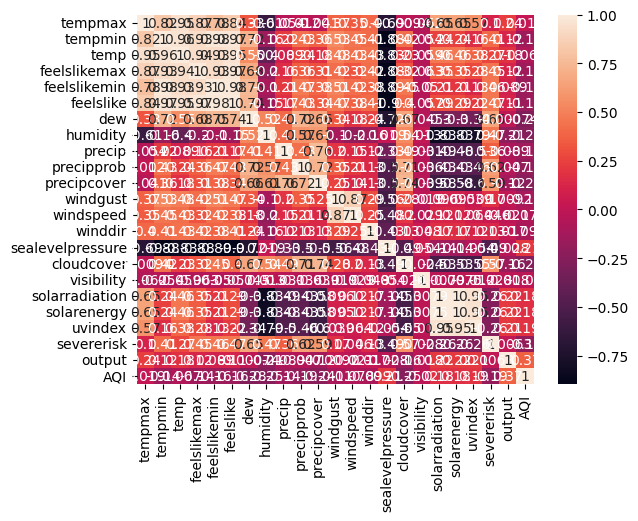

In [52]:
sns.heatmap(df.corr(), annot=True)

In [58]:
df.drop(columns=['feelslike','windspeed','winddir','sealevelpressure','cloudcover','visibility','uvindex','severerisk'], inplace=True)

In [59]:
df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,dew,humidity,precip,precipprob,precipcover,windgust,solarradiation,solarenergy,AQI,output
0,27.500000,13.500000,19.800000,27.000000,13.500000,11.400000,61.400000,0.000000,0,0.00,24.100000,185.600000,15.900000,50.100000,1
1,29.700000,12.000000,20.200000,28.200000,12.000000,8.600000,51.200000,0.000000,0,0.00,24.500000,227.600000,19.800000,44.100000,0
2,31.100000,16.300000,23.600000,29.100000,16.300000,9.600000,44.200000,0.000000,0,0.00,22.000000,280.400000,24.300000,51.500000,1
3,21.500000,10.100000,14.900000,21.500000,10.100000,9.200000,70.600000,0.000000,0,0.00,23.400000,218.900000,18.800000,49.100000,0
4,44.400000,30.600000,36.900000,44.600000,30.100000,15.500000,29.600000,0.000000,0,0.00,30.600000,316.100000,27.300000,39.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,32.743779,19.777989,25.123205,33.508133,19.777989,18.477989,68.881459,0.000000,0,0.00,18.317105,197.580862,17.122608,52.024641,1
1278,29.484200,14.230057,21.760886,28.560886,14.230057,12.075914,56.567629,0.000000,0,0.00,17.309828,262.908858,22.691714,45.424857,1
1279,44.599208,30.226685,37.085470,44.832035,29.745774,13.979392,27.425230,0.000000,0,0.00,46.257201,309.418297,26.713739,44.525230,1
1280,30.850125,18.524973,23.775027,30.225045,18.524973,15.049911,60.199679,0.174991,100,4.17,26.074813,242.573742,21.049875,50.000179,1


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
# Assuming 'df' is your DataFrame and 'output' is the target column
X = df.drop('output', axis=1)  # Features
y = df['output']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [ ]:
smote = SMOTE(random_state=42)  # Adjust random_state as needed
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_resampled

,tempmax,tempmin,temp,feelslikemax,feelslikemin,dew,humidity,precip,precipprob,precipcover,windgust,solarradiation,solarenergy,NDVI,AQI
0,30.600000,26.700000,28.400000,38.700000,26.700000,25.000000,81.900000,4.900000,100,25.000000,35.300000,192.000000,16.600000,0.746261,33.800000
1,31.500000,26.700000,28.700000,41.300000,26.700000,26.300000,86.900000,10.200000,100,75.000000,25.200000,146.400000,12.700000,0.563264,43.600000
2,33.500000,24.000000,28.700000,41.200000,24.000000,24.400000,78.600000,0.300000,100,12.500000,28.400000,270.900000,23.500000,0.438821,37.900000
3,33.200000,28.300000,30.500000,42.900000,33.500000,25.900000,76.700000,3.300000,100,54.170000,27.000000,156.400000,13.600000,0.404053,44.900000
4,29.200000,18.500000,22.600000,28.400000,18.500000,13.100000,56.100000,0.000000,0,0.000000,25.900000,239.100000,20.800000,0.513162,50.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,32.245132,17.125659,24.635396,30.345132,17.125659,10.056106,42.195050,0.000000,0,0.000000,18.438945,268.263367,23.210974,0.415258,46.938945
1266,33.089909,23.134252,27.788686,37.281352,23.134252,21.438231,70.215916,0.846788,100,12.500000,26.622939,270.717737,23.454434,0.394947,38.310091
1267,36.568186,24.974358,30.416239,36.444159,24.974358,16.104557,44.409114,0.000000,0,0.000000,26.484424,232.913297,20.065907,0.333478,42.300000
1268,34.002142,26.740832,29.624047,41.800592,30.209403,23.569998,70.761901,0.822619,100,10.189415,27.391311,210.637263,18.283214,0.416104,45.010952


In [ ]:
import pandas as pd

# Create a DataFrame from the resampled data
df = pd.DataFrame(X_train_resampled, columns=X_train.columns)  # Use original column names

# Add the target variable back to the DataFrame
df['output'] = y_train_resampled

# Now 'resampled_df' contains your resampled and merged data

In [ ]:
df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,dew,humidity,precip,precipprob,precipcover,windgust,solarradiation,solarenergy,NDVI,AQI,output
0,30.600000,26.700000,28.400000,38.700000,26.700000,25.000000,81.900000,4.900000,100,25.000000,35.300000,192.000000,16.600000,0.746261,33.800000,0
1,31.500000,26.700000,28.700000,41.300000,26.700000,26.300000,86.900000,10.200000,100,75.000000,25.200000,146.400000,12.700000,0.563264,43.600000,0
2,33.500000,24.000000,28.700000,41.200000,24.000000,24.400000,78.600000,0.300000,100,12.500000,28.400000,270.900000,23.500000,0.438821,37.900000,1
3,33.200000,28.300000,30.500000,42.900000,33.500000,25.900000,76.700000,3.300000,100,54.170000,27.000000,156.400000,13.600000,0.404053,44.900000,1
4,29.200000,18.500000,22.600000,28.400000,18.500000,13.100000,56.100000,0.000000,0,0.000000,25.900000,239.100000,20.800000,0.513162,50.100000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,32.245132,17.125659,24.635396,30.345132,17.125659,10.056106,42.195050,0.000000,0,0.000000,18.438945,268.263367,23.210974,0.415258,46.938945,1
1266,33.089909,23.134252,27.788686,37.281352,23.134252,21.438231,70.215916,0.846788,100,12.500000,26.622939,270.717737,23.454434,0.394947,38.310091,1
1267,36.568186,24.974358,30.416239,36.444159,24.974358,16.104557,44.409114,0.000000,0,0.000000,26.484424,232.913297,20.065907,0.333478,42.300000,1
1268,34.002142,26.740832,29.624047,41.800592,30.209403,23.569998,70.761901,0.822619,100,10.189415,27.391311,210.637263,18.283214,0.416104,45.010952,1


# EDA - Exploratory Data Analysis

In [60]:
# Display basic information
print(df.info())

# 1. Descriptive Statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tempmax         1282 non-null   float64
 1   tempmin         1282 non-null   float64
 2   temp            1282 non-null   float64
 3   feelslikemax    1282 non-null   float64
 4   feelslikemin    1282 non-null   float64
 5   dew             1282 non-null   float64
 6   humidity        1282 non-null   float64
 7   precip          1282 non-null   float64
 8   precipprob      1282 non-null   int64  
 9   precipcover     1282 non-null   float64
 10  windgust        1282 non-null   float64
 11  solarradiation  1282 non-null   float64
 12  solarenergy     1282 non-null   float64
 13  AQI             1282 non-null   float64
 14  output          1282 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 150.4 KB
None
           tempmax      tempmin         temp  feelslikemax  feelslikem

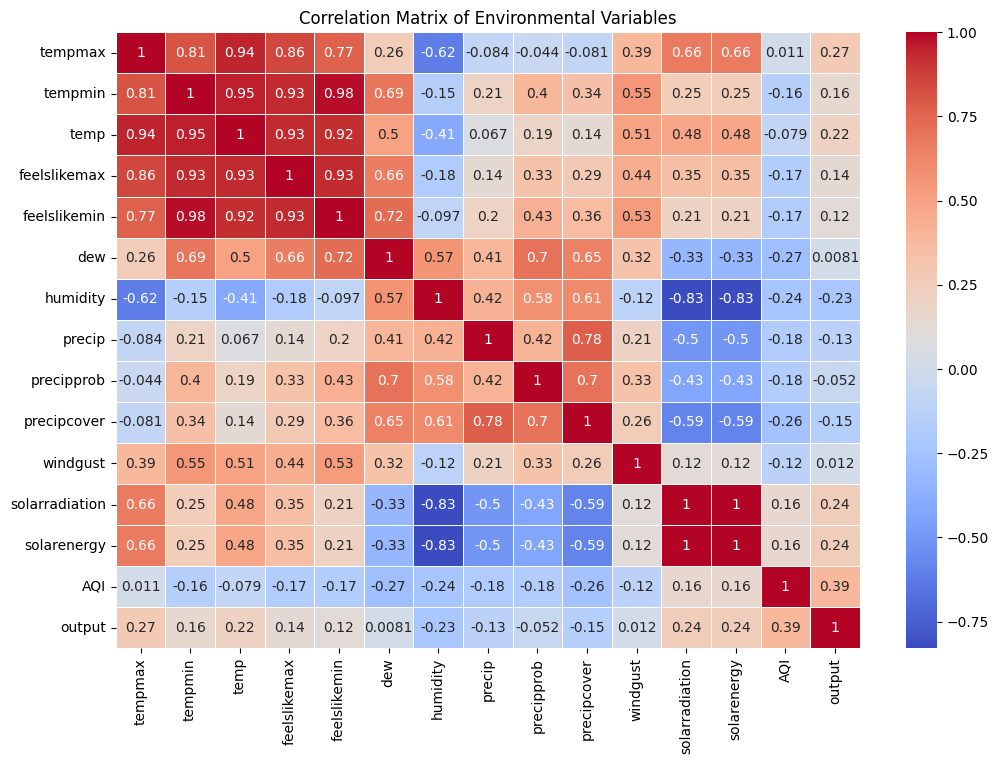

In [61]:
# 2. Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Environmental Variables")
plt.show()

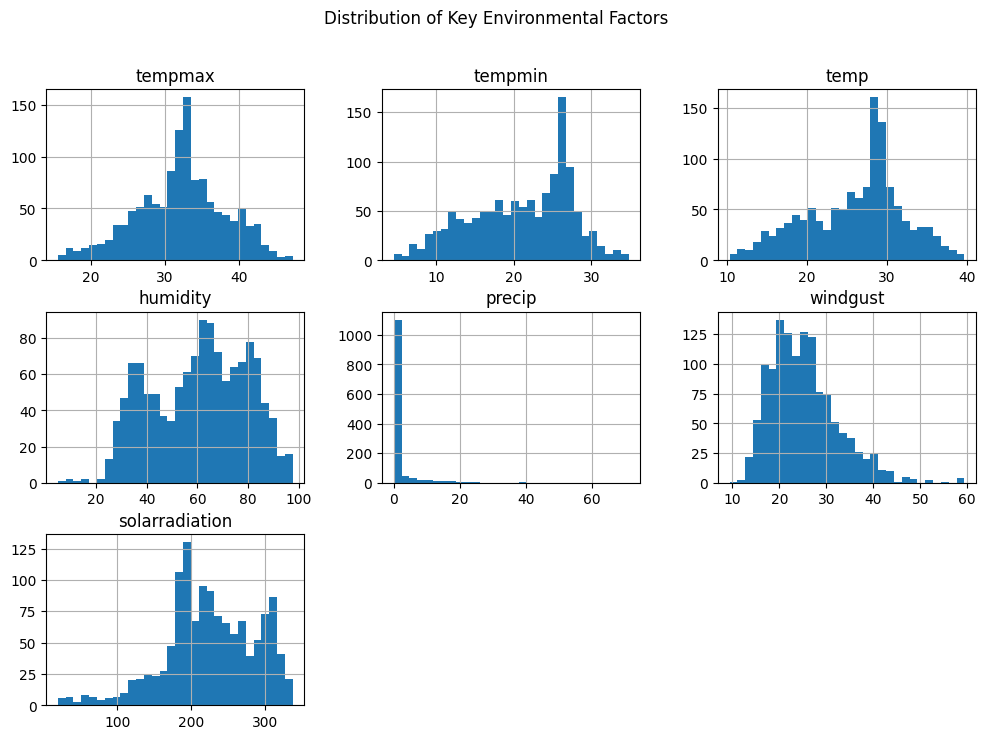

In [62]:
# 3. Distribution Analysis - Histograms
df[['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'windgust', 'solarradiation']].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of Key Environmental Factors")
plt.show()

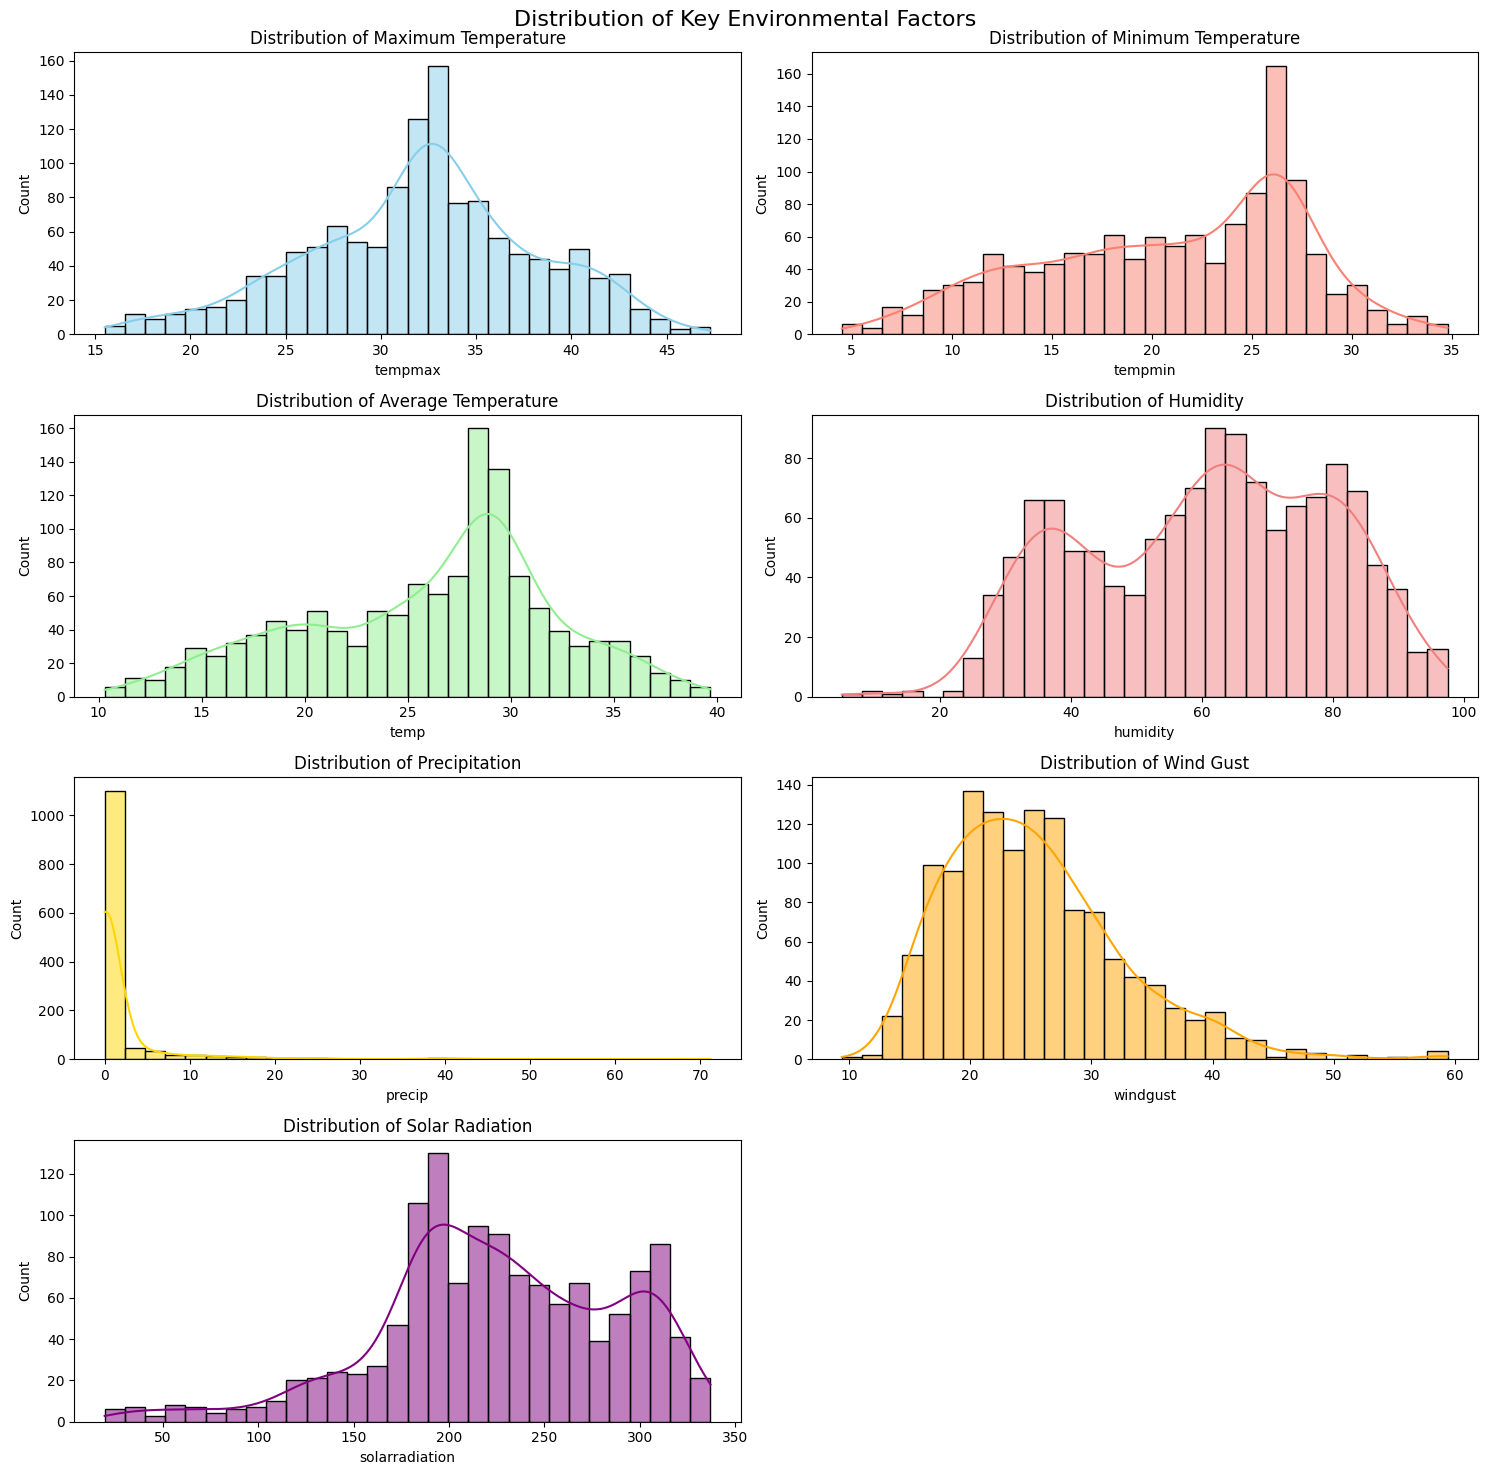

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Distribution Analysis - Histograms with Enhancements
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))  # Create a grid of subplots
fig.suptitle("Distribution of Key Environmental Factors", fontsize=16)  # Main title

# Plot each histogram on a separate subplot with individual titles and colors
sns.histplot(df['tempmax'], bins=30, ax=axes[0, 0], color='skyblue', kde=True).set(title='Distribution of Maximum Temperature')
sns.histplot(df['tempmin'], bins=30, ax=axes[0, 1], color='salmon', kde=True).set(title='Distribution of Minimum Temperature')
sns.histplot(df['temp'], bins=30, ax=axes[1, 0], color='lightgreen', kde=True).set(title='Distribution of Average Temperature')
sns.histplot(df['humidity'], bins=30, ax=axes[1, 1], color='lightcoral', kde=True).set(title='Distribution of Humidity')
sns.histplot(df['precip'], bins=30, ax=axes[2, 0], color='gold', kde=True).set(title='Distribution of Precipitation')
sns.histplot(df['windgust'], bins=30, ax=axes[2, 1], color='orange', kde=True).set(title='Distribution of Wind Gust')
sns.histplot(df['solarradiation'], bins=30, ax=axes[3, 0], color='purple', kde=True).set(title='Distribution of Solar Radiation')

# Remove the empty subplot (if any)
fig.delaxes(axes[3, 1])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

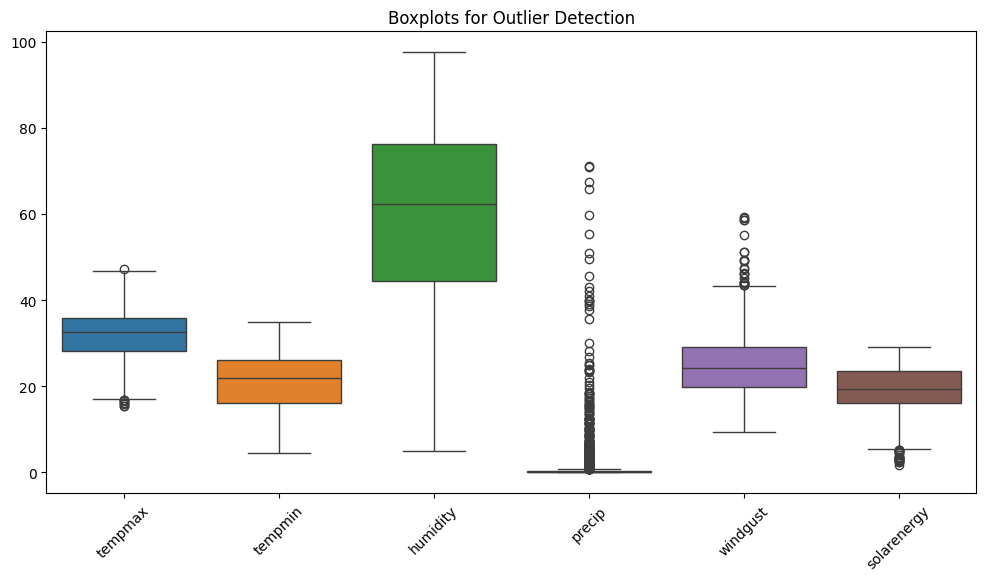

In [64]:
# 4. Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['tempmax', 'tempmin', 'humidity', 'precip', 'windgust', 'solarenergy']])
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [65]:
# 5. Handling Outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size (outliers removed): {df_cleaned.shape}")

Original dataset size: (1282, 15)
Cleaned dataset size (outliers removed): (988, 15)


In [66]:
# 6. Time-Series Decomposition (if timestamp is present)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    plt.figure(figsize=(12, 6))
    df[['temp', 'humidity', 'precip']].plot(subplots=True, layout=(3,1), figsize=(12, 8), title="Time Series of Environmental Factors")
    plt.show()

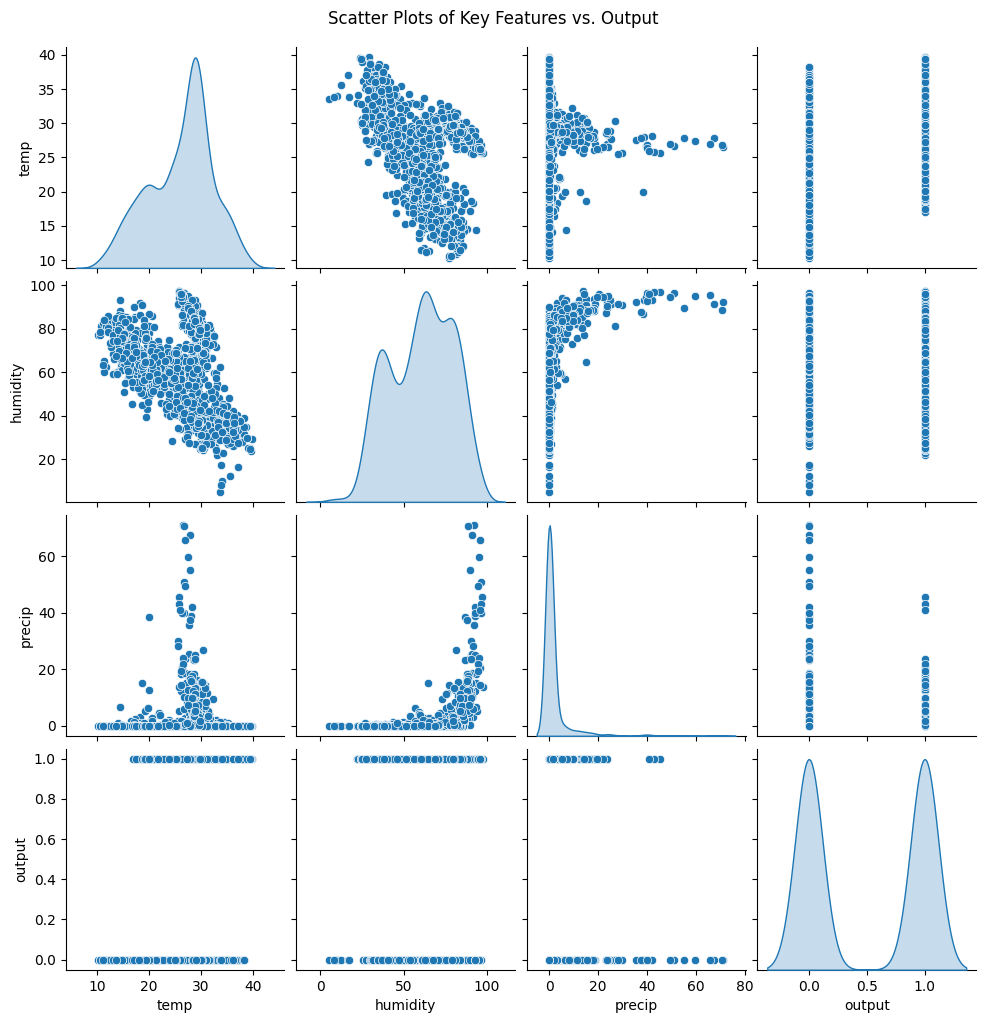

In [67]:

# 7. Scatter Plots
sns.pairplot(df[['temp', 'humidity', 'precip', 'output']], diag_kind="kde")
plt.suptitle("Scatter Plots of Key Features vs. Output", y=1.02)
plt.show()




In [68]:
df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,dew,humidity,precip,precipprob,precipcover,windgust,solarradiation,solarenergy,AQI,output
0,27.500000,13.500000,19.800000,27.000000,13.500000,11.400000,61.400000,0.000000,0,0.00,24.100000,185.600000,15.900000,50.100000,1
1,29.700000,12.000000,20.200000,28.200000,12.000000,8.600000,51.200000,0.000000,0,0.00,24.500000,227.600000,19.800000,44.100000,0
2,31.100000,16.300000,23.600000,29.100000,16.300000,9.600000,44.200000,0.000000,0,0.00,22.000000,280.400000,24.300000,51.500000,1
3,21.500000,10.100000,14.900000,21.500000,10.100000,9.200000,70.600000,0.000000,0,0.00,23.400000,218.900000,18.800000,49.100000,0
4,44.400000,30.600000,36.900000,44.600000,30.100000,15.500000,29.600000,0.000000,0,0.00,30.600000,316.100000,27.300000,39.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,32.743779,19.777989,25.123205,33.508133,19.777989,18.477989,68.881459,0.000000,0,0.00,18.317105,197.580862,17.122608,52.024641,1
1278,29.484200,14.230057,21.760886,28.560886,14.230057,12.075914,56.567629,0.000000,0,0.00,17.309828,262.908858,22.691714,45.424857,1
1279,44.599208,30.226685,37.085470,44.832035,29.745774,13.979392,27.425230,0.000000,0,0.00,46.257201,309.418297,26.713739,44.525230,1
1280,30.850125,18.524973,23.775027,30.225045,18.524973,15.049911,60.199679,0.174991,100,4.17,26.074813,242.573742,21.049875,50.000179,1


In [ ]:
df.corr()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,dew,humidity,precip,precipprob,precipcover,windgust,solarradiation,solarenergy,NDVI,AQI,output
tempmax,1.000000,0.828682,0.952799,0.875794,0.783301,0.254110,-0.678640,-0.106521,-0.079397,-0.119892,0.404544,0.692841,0.692287,-0.441845,0.029385,0.660188
tempmin,0.828682,1.000000,0.955356,0.926352,0.982957,0.662402,-0.256091,0.170309,0.330025,0.286970,0.565813,0.300147,0.299567,-0.087909,-0.157853,0.428510
temp,0.952799,0.955356,1.000000,0.938044,0.921793,0.474010,-0.494613,0.032367,0.130148,0.085743,0.513105,0.524695,0.524071,-0.279935,-0.070525,0.577551
feelslikemax,0.875794,0.926352,0.938044,1.000000,0.923535,0.622947,-0.291124,0.103618,0.249972,0.225943,0.451489,0.402508,0.402478,-0.103666,-0.147041,0.422142
feelslikemin,0.783301,0.982957,0.921793,0.923535,1.000000,0.706098,-0.186283,0.175450,0.373841,0.319878,0.542237,0.250691,0.250487,-0.042581,-0.177319,0.384417
dew,0.254110,0.662402,0.474010,0.622947,0.706098,1.000000,0.510400,0.411312,0.683385,0.651205,0.342430,-0.314867,-0.314250,0.480846,-0.297283,-0.146666
humidity,-0.678640,-0.256091,-0.494613,-0.291124,-0.186283,0.510400,1.000000,0.430180,0.567595,0.621103,-0.146625,-0.849465,-0.848502,0.764623,-0.247769,-0.726152
precip,-0.106521,0.170309,0.032367,0.103618,0.175450,0.411312,0.430180,1.000000,0.422364,0.772351,0.187120,-0.498894,-0.498800,0.302159,-0.204114,-0.158314
precipprob,-0.079397,0.330025,0.130148,0.249972,0.373841,0.683385,0.567595,0.422364,1.000000,0.703971,0.310079,-0.446518,-0.445158,0.420839,-0.225894,-0.174958
precipcover,-0.119892,0.286970,0.085743,0.225943,0.319878,0.651205,0.621103,0.772351,0.703971,1.000000,0.219277,-0.601352,-0.601199,0.481234,-0.281839,-0.263234


In [69]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'output' is your target variable
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       138
           1       0.67      0.72      0.70       119

    accuracy                           0.71       257
   macro avg       0.71      0.71      0.71       257
weighted avg       0.71      0.71      0.71       257



In [73]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[96 42]
 [33 86]]


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [75]:
# Testing Data Accuracy

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_pred))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_pred))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, nb_pred))

Decision Tree Accuracy: 0.8599221789883269
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       138
           1       0.85      0.85      0.85       119

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.86      0.86      0.86       257

Random Forest Accuracy: 0.8910505836575876
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       138
           1       0.88      0.89      0.88       119

    accuracy                           0.89       257
   macro avg       0.89      0.89      0.89       257
weighted avg       0.89      0.89      0.89       257

SVM Accuracy: 0.688715953307393
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       138
           1       0.65      0.71      0.68       119

    accuracy                           0.69       257
   macro a

In [76]:
# Training Data Accuracy

# Decision Tree
dt_train_pred = dt_model.predict(X_train)
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
print("Decision Tree Train Accuracy:", dt_train_accuracy)
print(classification_report(y_train, dt_train_pred))

# Random Forest
rf_train_pred = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
print("Random Forest Train Accuracy:", rf_train_accuracy)
print(classification_report(y_train, rf_train_pred))

# Support Vector Machine (SVM)
svm_train_pred = svm_model.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
print("SVM Train Accuracy:", svm_train_accuracy)
print(classification_report(y_train, svm_train_pred))

# Naive Bayes
nb_train_pred = nb_model.predict(X_train)
nb_train_accuracy = accuracy_score(y_train, nb_train_pred)
print("Naive Bayes Train Accuracy:", nb_train_accuracy)
print(classification_report(y_train, nb_train_pred))

Decision Tree Train Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       503
           1       1.00      1.00      1.00       522

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025

Random Forest Train Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       503
           1       1.00      1.00      1.00       522

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025

SVM Train Accuracy: 0.646829268292683
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       503
           1       0.64      0.71      0.67       522

    accuracy                           0.65      1025
   macro avg       0.6

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grids for each model
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and train the models with GridSearchCV
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

In [ ]:
# Get the best models
best_dt_model = dt_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

# Evaluate on training data
dt_train_pred = best_dt_model.predict(X_train)
rf_train_pred = best_rf_model.predict(X_train)

In [ ]:

dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)

print("Decision Tree Train Accuracy (Tuned):", dt_train_accuracy)
print(classification_report(y_train, dt_train_pred))

print("Random Forest Train Accuracy (Tuned):", rf_train_accuracy)
print(classification_report(y_train, rf_train_pred))

# Evaluate on testing data
dt_test_pred = best_dt_model.predict(X_test)
rf_test_pred = best_rf_model.predict(X_test)

dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

print("Decision Tree Test Accuracy (Tuned):", dt_test_accuracy)
print(classification_report(y_test, dt_test_pred))

print("Random Forest Test Accuracy (Tuned):", rf_test_accuracy)
print(classification_report(y_test, rf_test_pred))

In [ ]:
dt_grid_search.best_estimator_

In [ ]:
dt_grid_search.best_params_

In [ ]:
rf_grid_search.best_estimator_

In [ ]:
rf_grid_search.best_params_

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Logistic Regression
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred))

# Decision Tree
print("\nConfusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, dt_pred))

# Random Forest
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_pred))

# SVM
print("\nConfusion Matrix for SVM:")
print(confusion_matrix(y_test, svm_pred))

# Naive Bayes
print("\nConfusion Matrix for Naive Bayes:")
print(confusion_matrix(y_test, nb_pred))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) # Input layer with 128 neurons
model.add(Dense(64, activation='relu')) # Hidden layer with 64 neurons
model.add(Dense(1, activation='sigmoid')) # Output layer with sigmoid activation for binary classification

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have your trained neural network model as 'model'
# and your test data as X_test and y_test

# Get predictions from your neural network model
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history in 'history'
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
sns.heatmap(df.corr(), annot=True,cmap="viridis", linewidths=0.5)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 8))  # Adjust width and height as needed
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()